In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from methods import * 

In [3]:
sns.set_theme(rc = {"figure.figsize": (10, 5)})

In [4]:
df = pd.read_csv("flights.csv", parse_dates=True)
print(df.shape)
df.head(2)

(336776, 21)


,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.


In [5]:
df.isna().sum()

id                   0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
dtype: int64

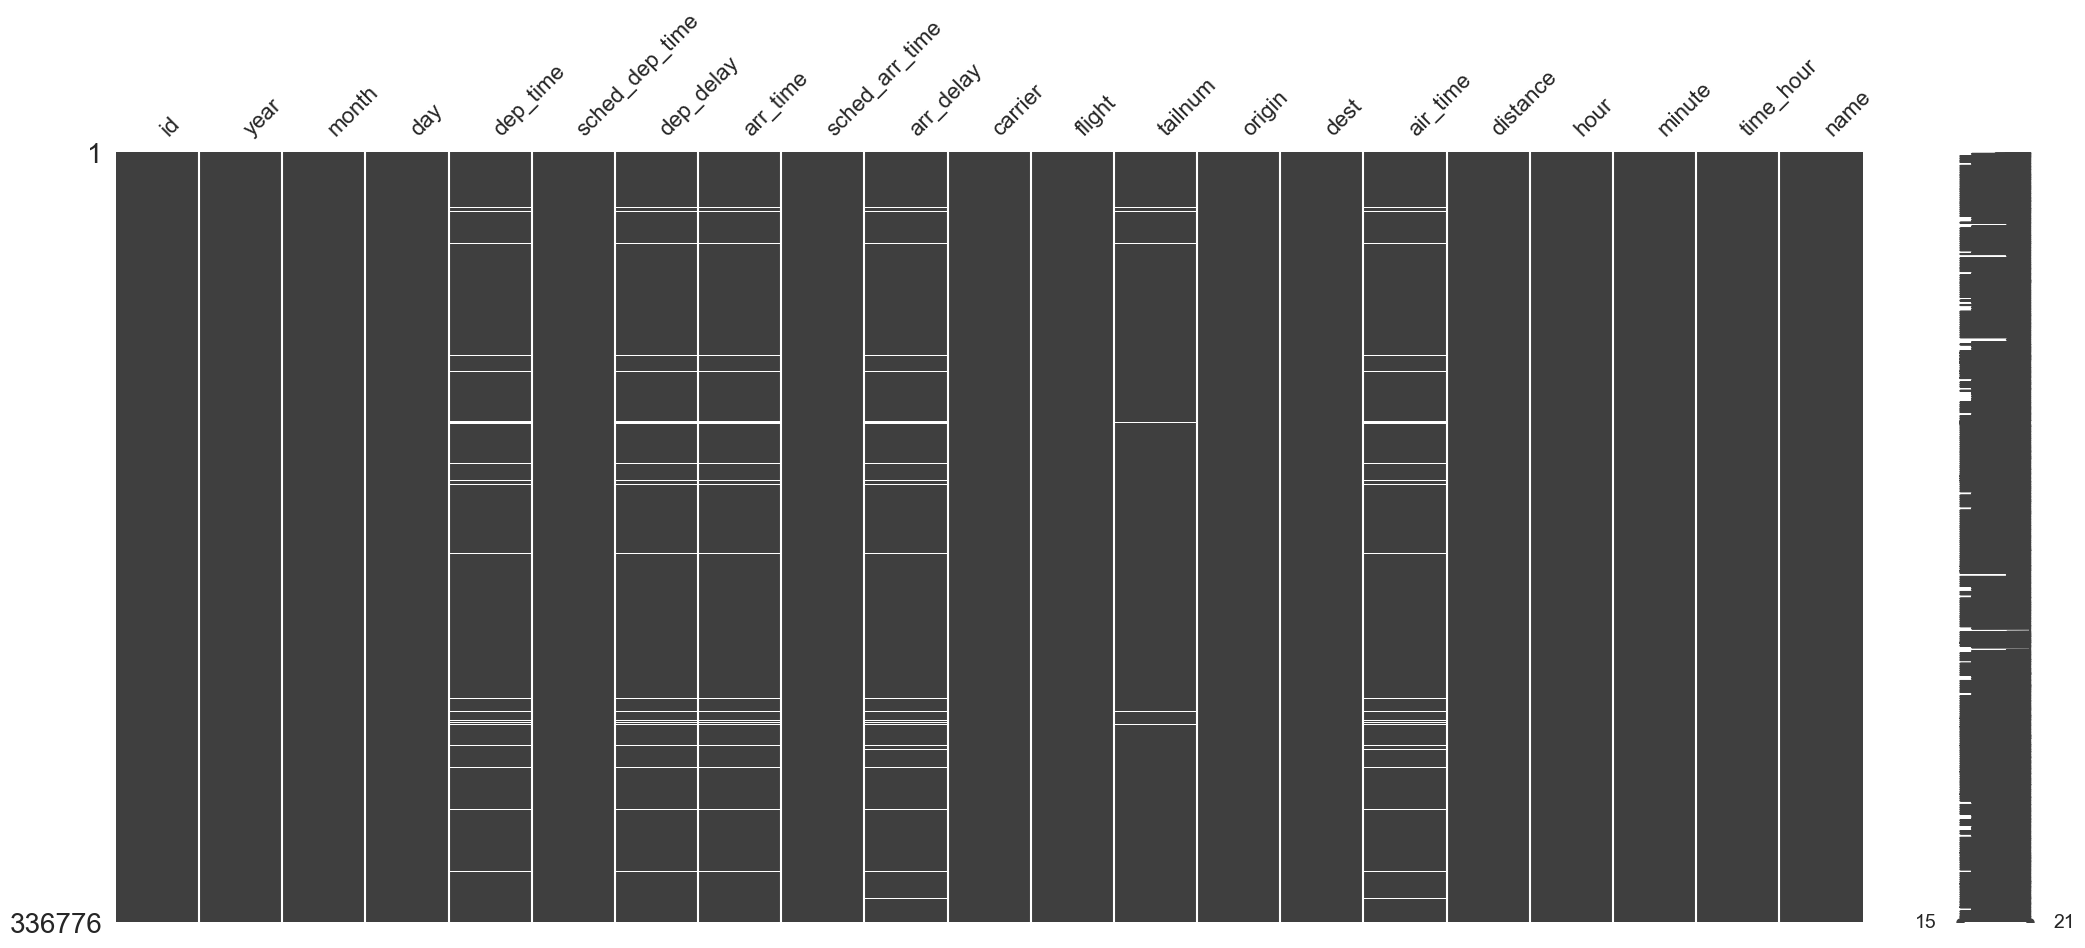

In [6]:
msno.matrix(df);

---

1. On considère que les valeurs manquantes sont de type MNAR (Missing Not At Random) pour les
variables numériques, et de type MCAR (Missing Completely At Random) pour les variables
qualitatives. Sélectionnez les méthodes d'imputation adéquates, puis appliquez-les correctement

- Voici le code pour recuperer toutes les colonnes (**qualitatives** et **quantitatives**) 👇🏻 ayant de valeurs manquantes (NaN)

In [7]:
nan_vars = df.columns[df.isnull().any()]
nan_vars

Index(['dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'tailnum',
       'air_time'],
      dtype='object')

---

- Voici le code pour recuperer uniquement les variables **NUMERIQUES** ayant des NaN

In [8]:
nan_num_vars = df[nan_vars].select_dtypes("number").columns
nan_num_vars # 👇🏻

Index(['dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'air_time'], dtype='object')

---

- Voici le code pour recuperer uniquement les variables **QUALITATIVES** ayant des NaN

In [9]:
nan_cat_vars = df[nan_vars].select_dtypes("object").columns
nan_cat_vars # 👇🏻

Index(['tailnum'], dtype='object')

---

- Traitement de valeurs manquantes (variables numeriques)

    - determination de la methode adequate

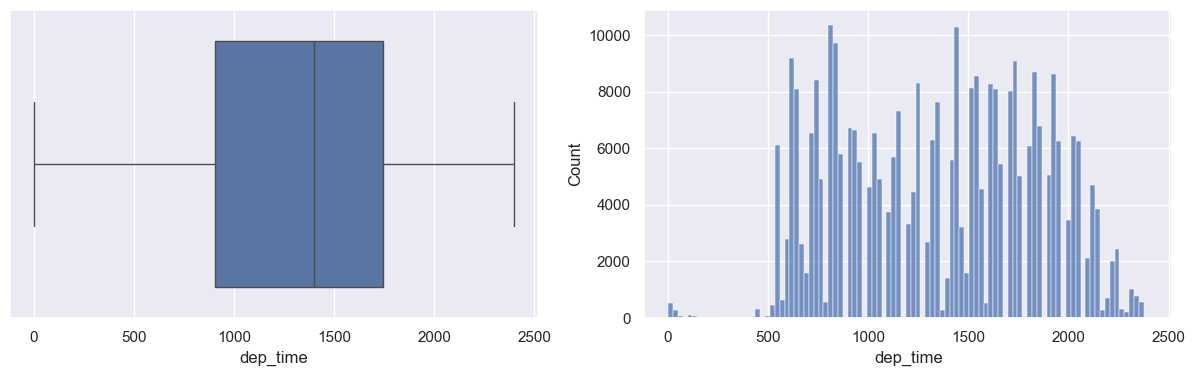

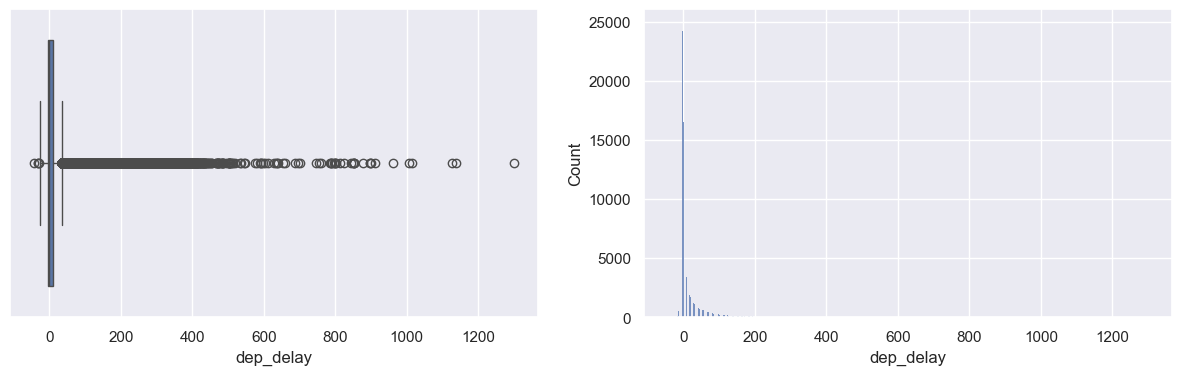

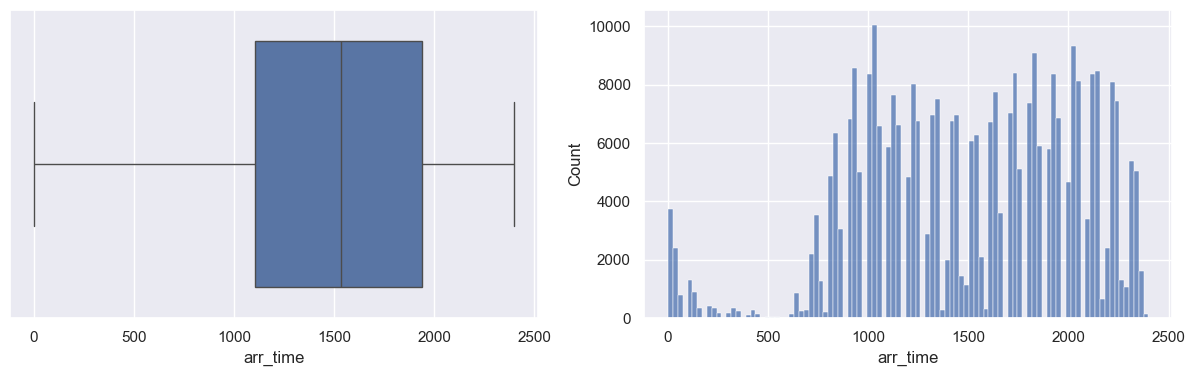

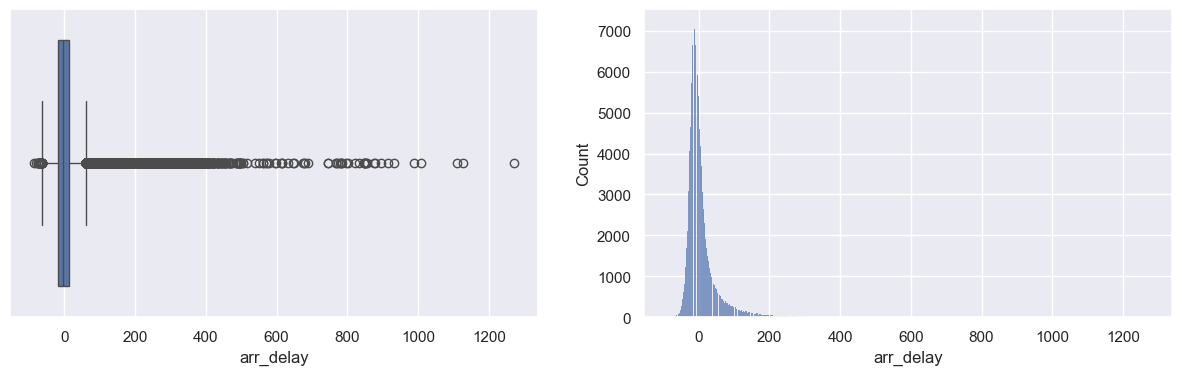

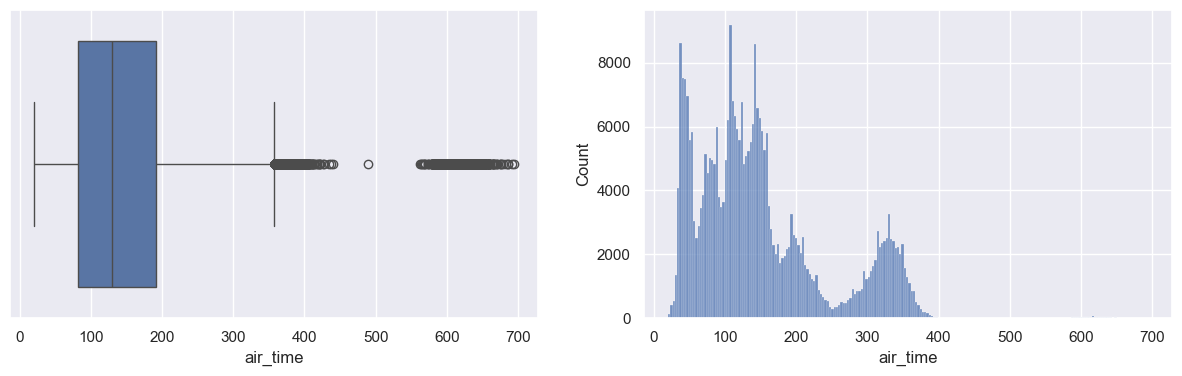

In [10]:
graphics(data=df[nan_num_vars])

- ☝️ on remarque qu'il y a beaucoup de valeurs manquantes et que les distributions sont **asymetriques**, je peux donc choisir **IterativeImputer** mais pour cela il faut encore verifier que les variables numeriques qui ont des valeurs manquantes sont **CORRELEES**

In [11]:
nan_num_vars

Index(['dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'air_time'], dtype='object')

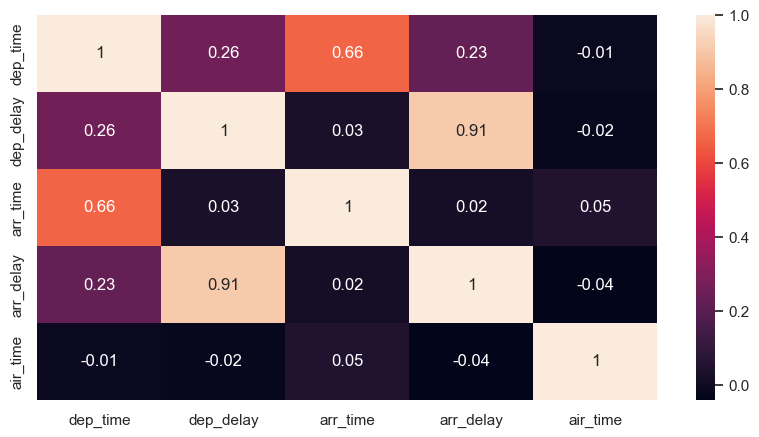

In [12]:
               # 👇🏻 choisir UNIQUEMENT les variables numeriques qui ont des valeurs ma
sns.heatmap(df[nan_num_vars].corr().round(2), annot=True);

- ☝️ Ce visuel nous montre que les variables ['dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'air_time'] sont correlees

- Par consequant, la methode adequate pour imputer les valeurs manquantes pour les variables numeriques est donc  **IterativeImputer** 👈🏼 voir slides numero 163 du cours 

- ☝️ `N'oubliez pas que cette methode EXIGE que les variables soient STANDARDISEES au préalable (c'est à dire echelle commune)`

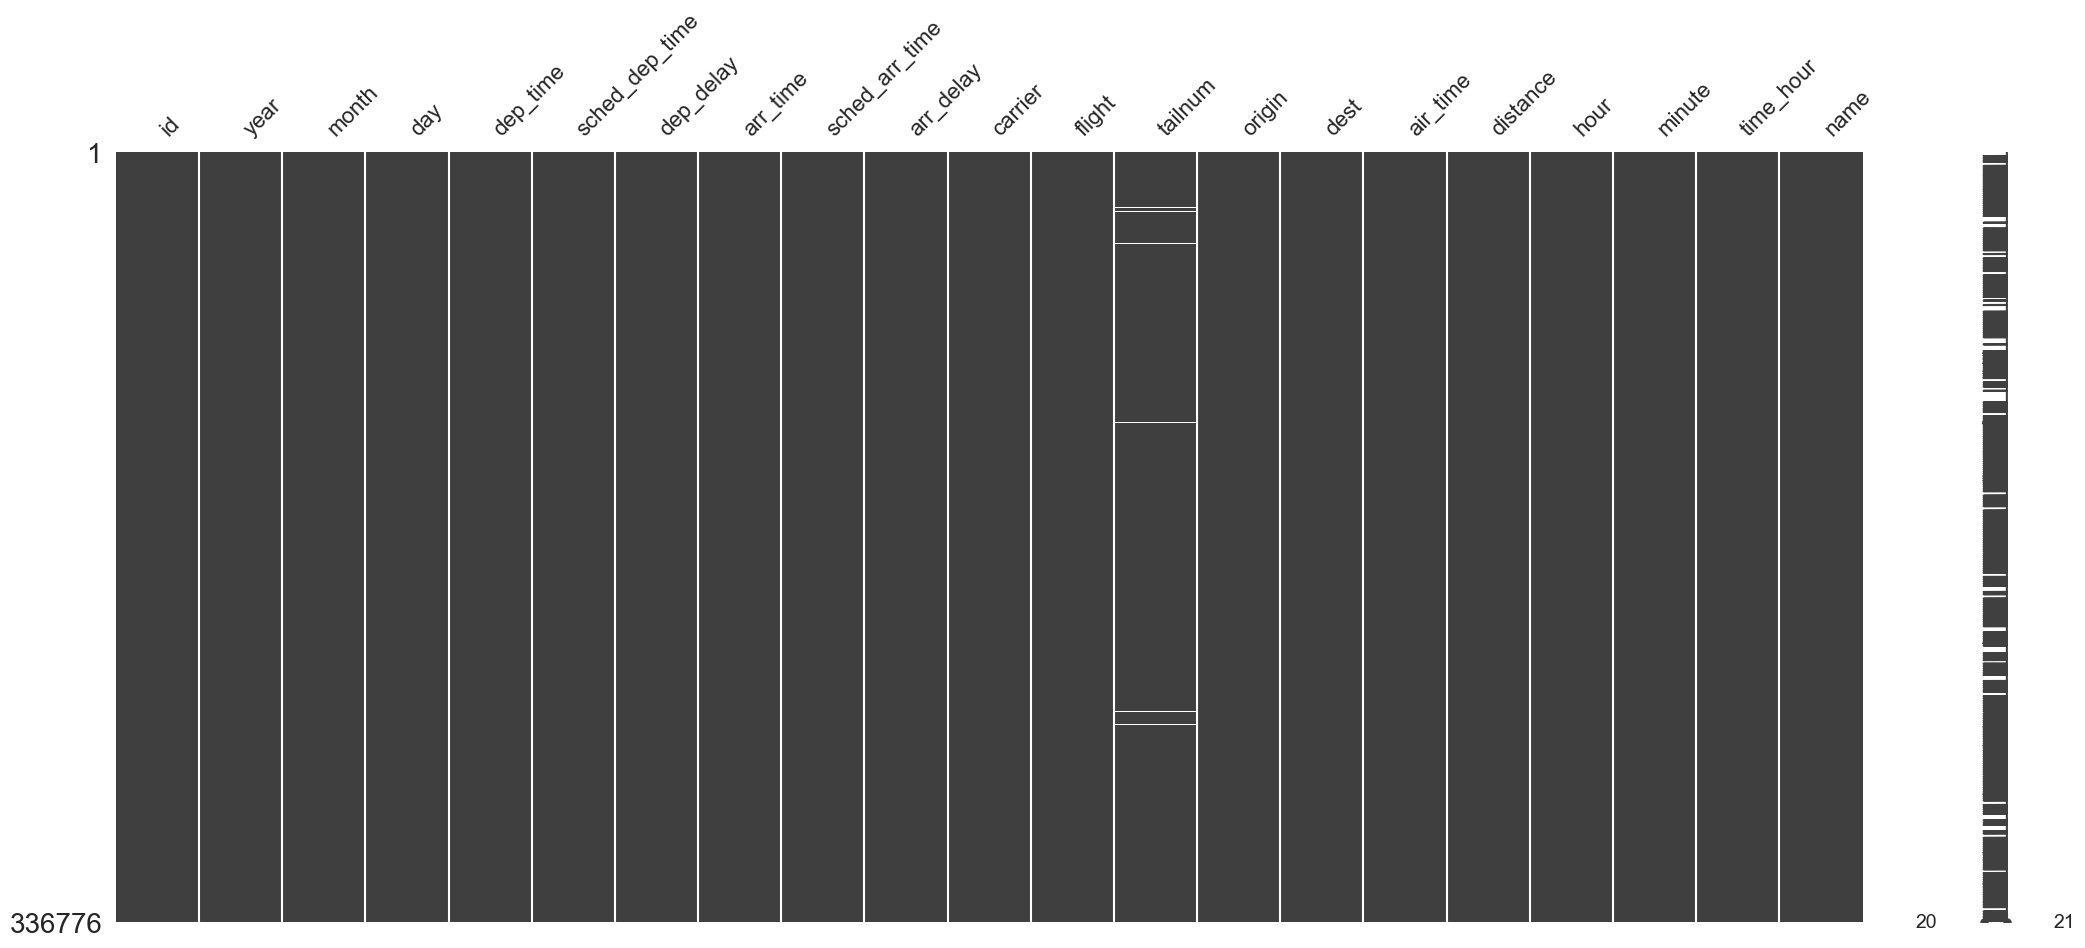

In [13]:
df[nan_num_vars] = RobustScaler().fit_transform(df[nan_num_vars])
df[nan_num_vars] = IterativeImputer().fit_transform(df[nan_num_vars])
msno.matrix(df);

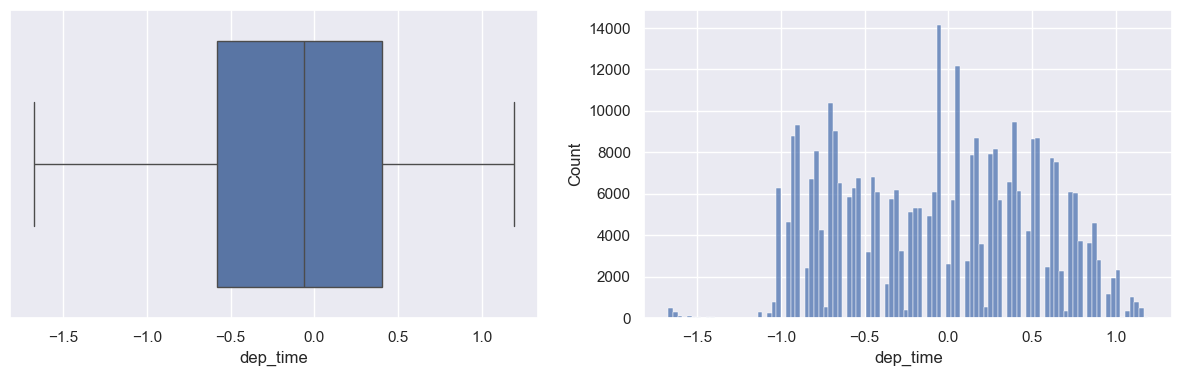

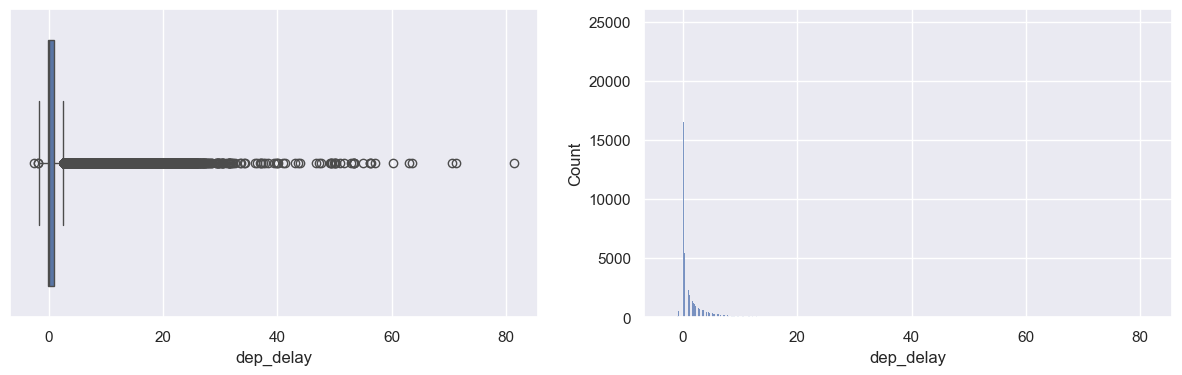

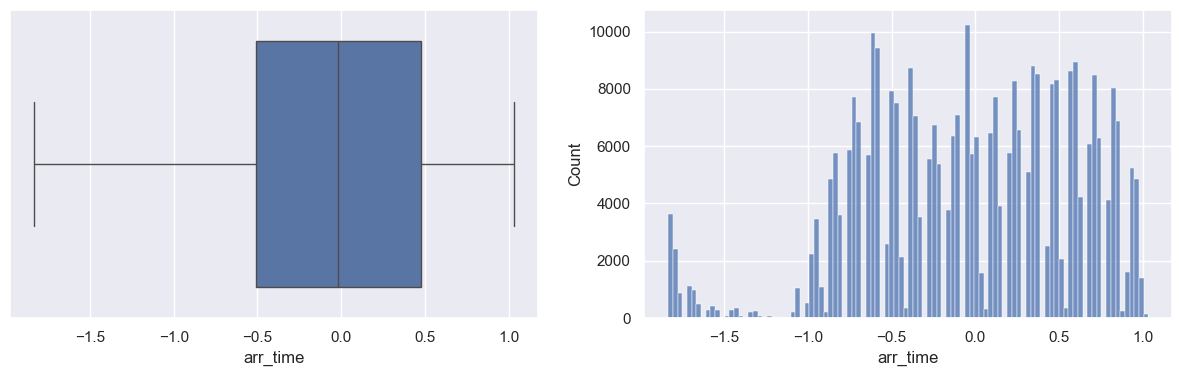

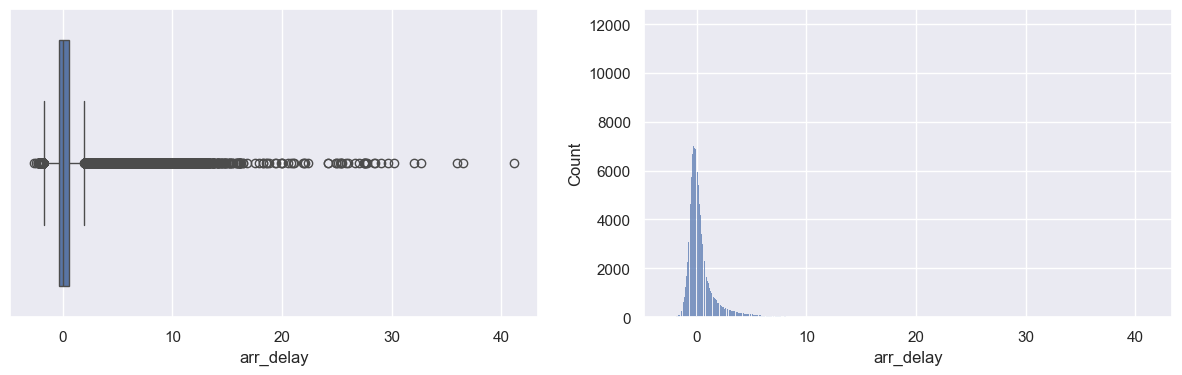

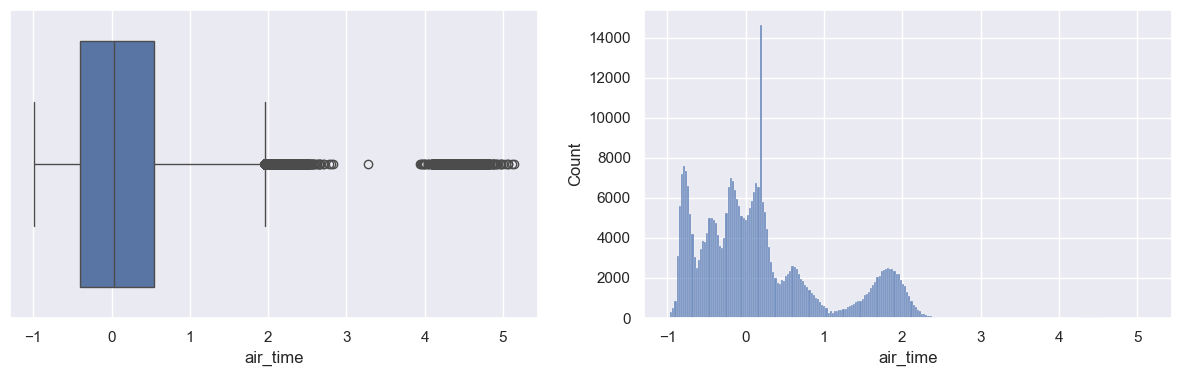

In [14]:
graphics(df[nan_num_vars])

---

- Imputer les valeurs manquantes pour la variable qualitative **tailnum** par le mode

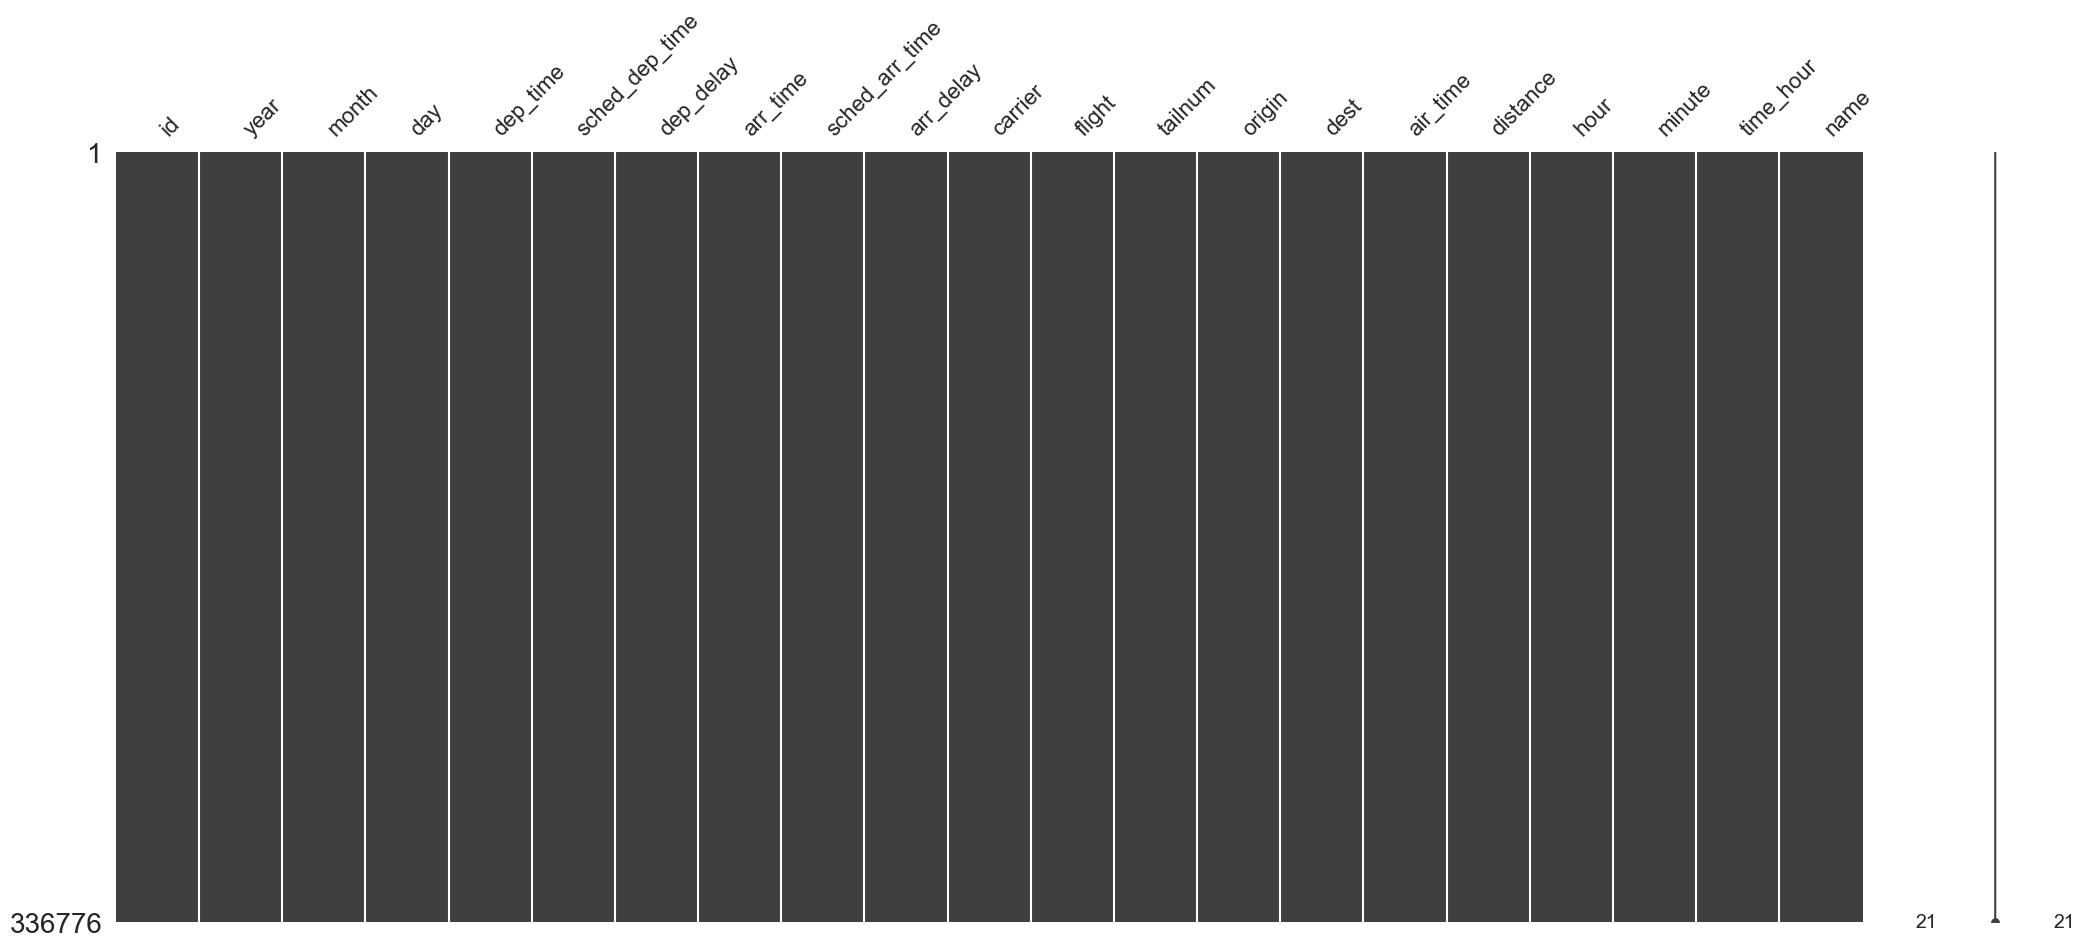

In [15]:
df[nan_cat_vars] = SimpleImputer(strategy="most_frequent").fit_transform(df[nan_cat_vars])
msno.matrix(df);

---

2. Remplacer les valeurs aberrantes de façon à ce que les distributions de données ne soient pas
modifiées

D'apres les visuels precedents(graphics(df[num_vars]) ), la methode adequate c'est **imputeOutlierIQR** ou bien **imputeOutlierWinsor** 


In [ ]:
                                                    # ce 👇🏻 sont 👇🏻 des simples identifiants, il faut donc les enlever de la liste des variables à imputer
outlier_cols = df.select_dtypes('number').drop(columns=['id', 'flight']).columns
imputeOutlierIQR(data=df[outlier_cols])

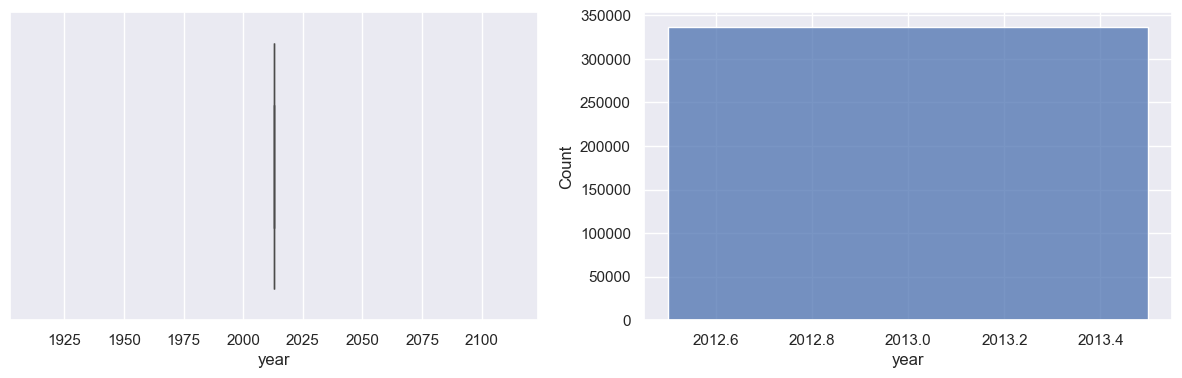

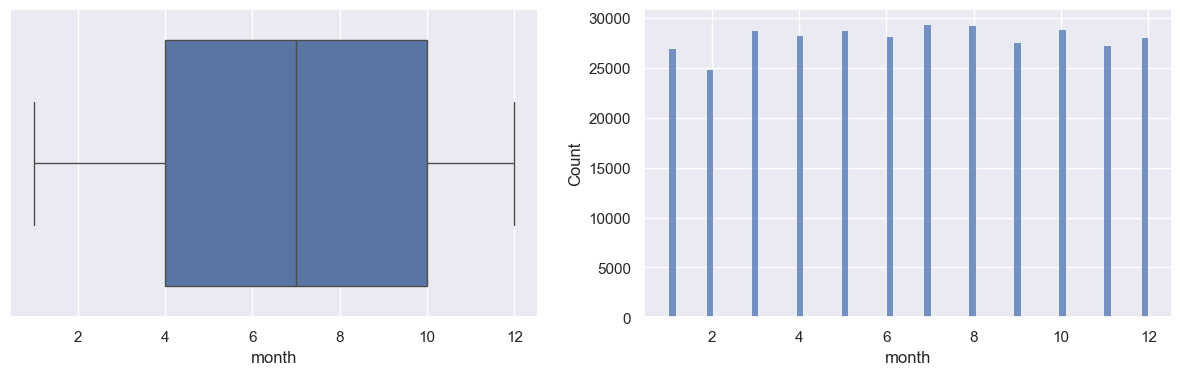

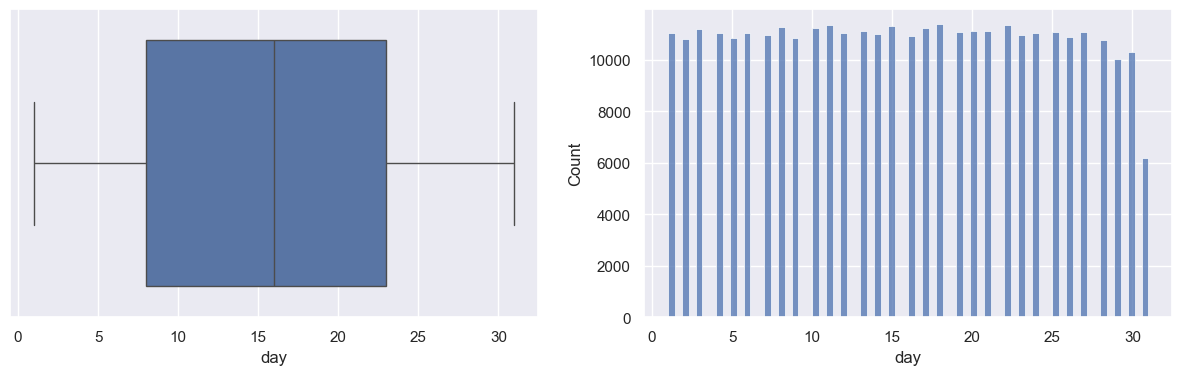

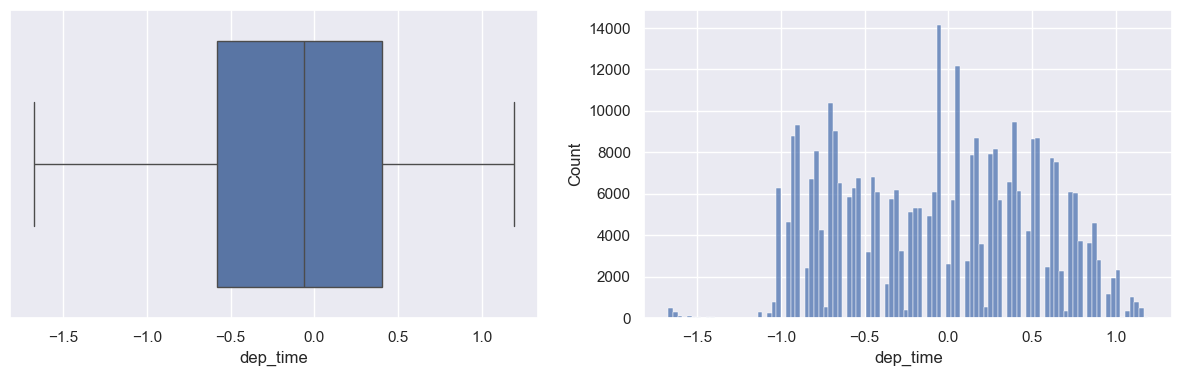

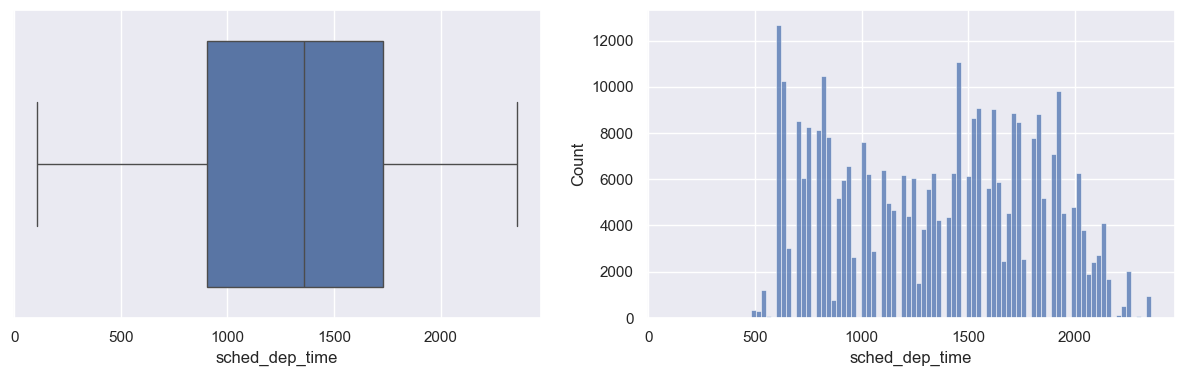

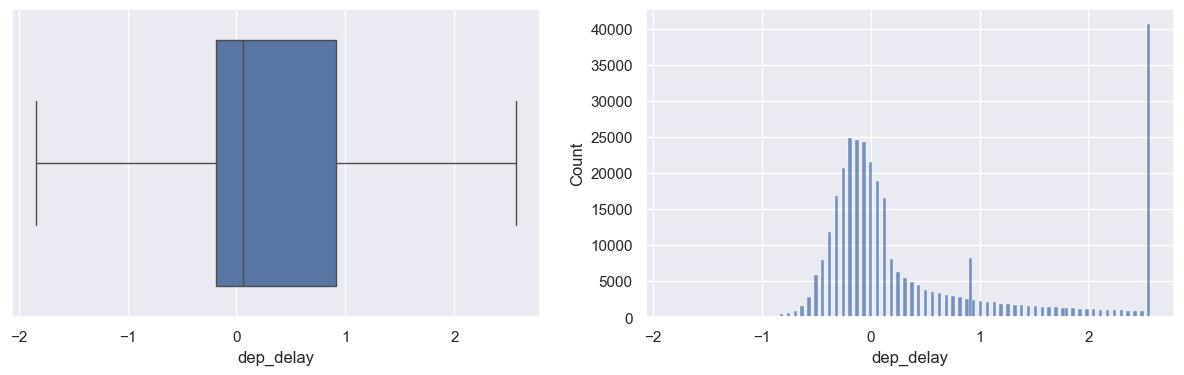

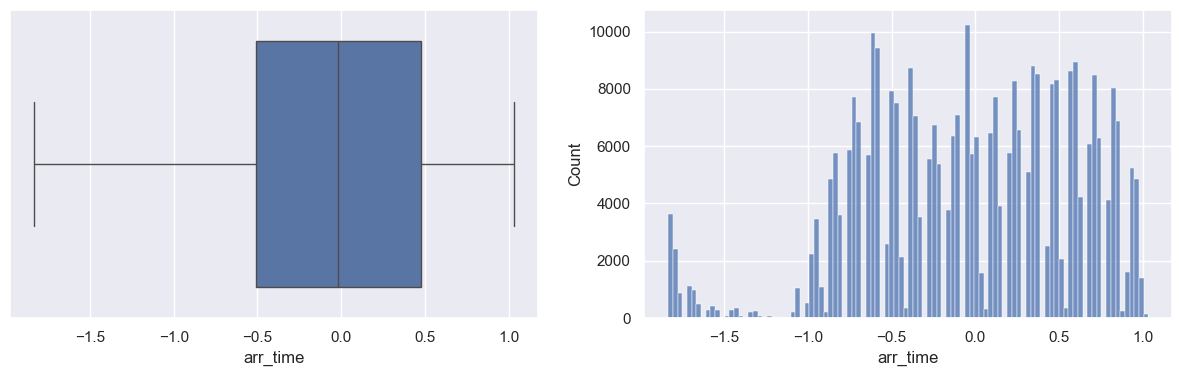

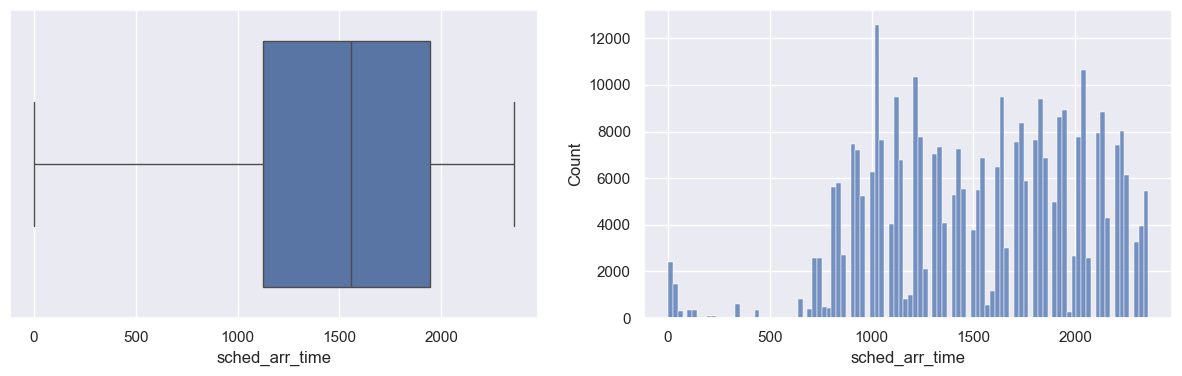

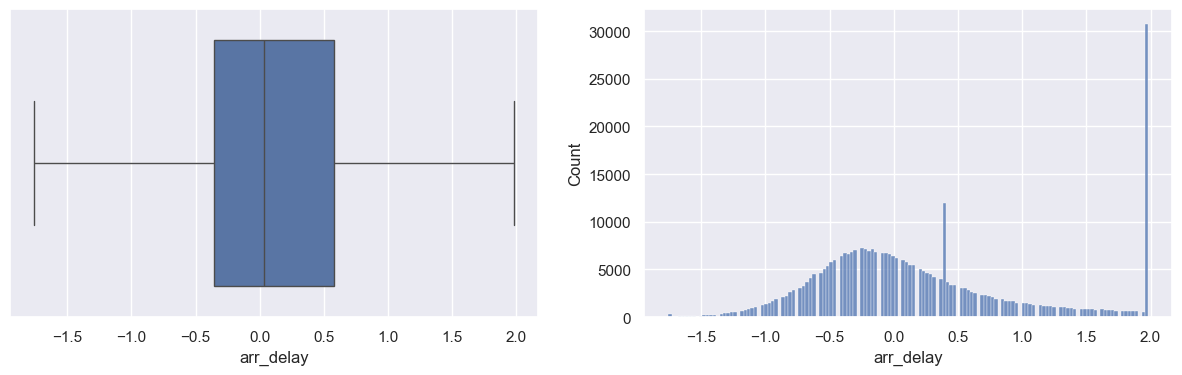

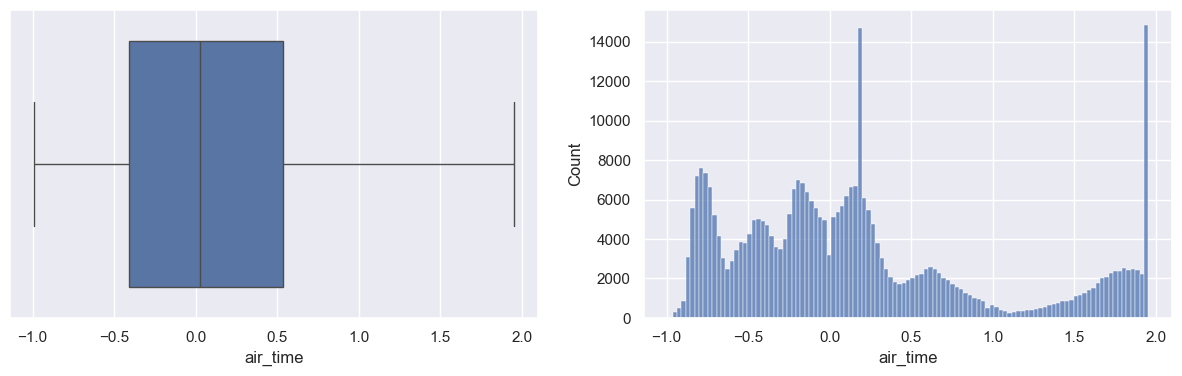

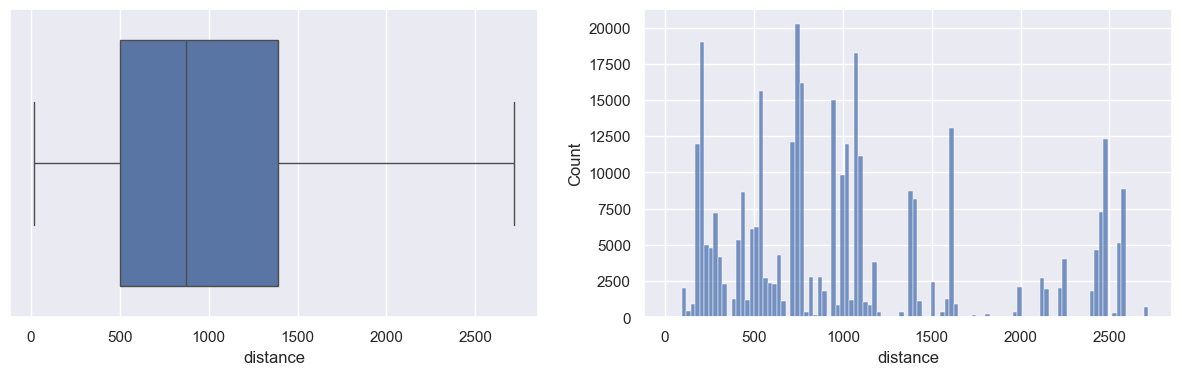

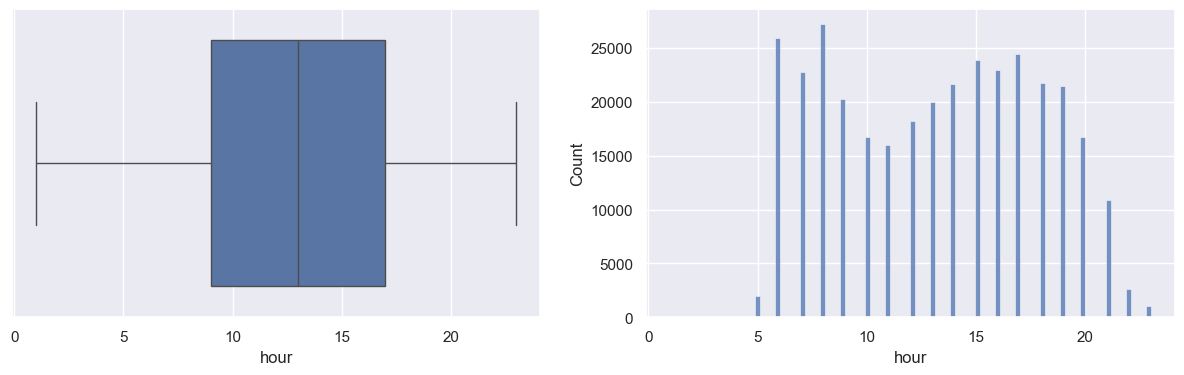

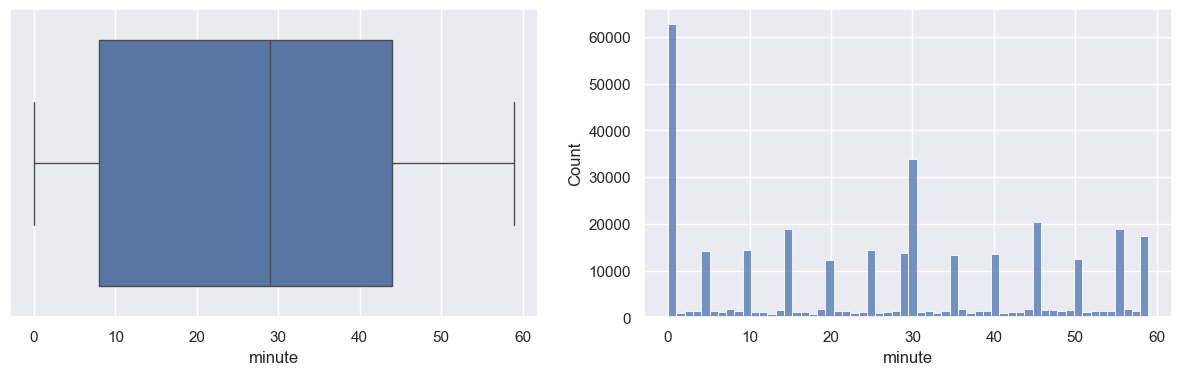

In [17]:
graphics(data=df[outlier_cols])

---

- 4. Repartiton du nombre de vols par compagnie et quelle compagnie a le plus grand /petit nombre de vols ?

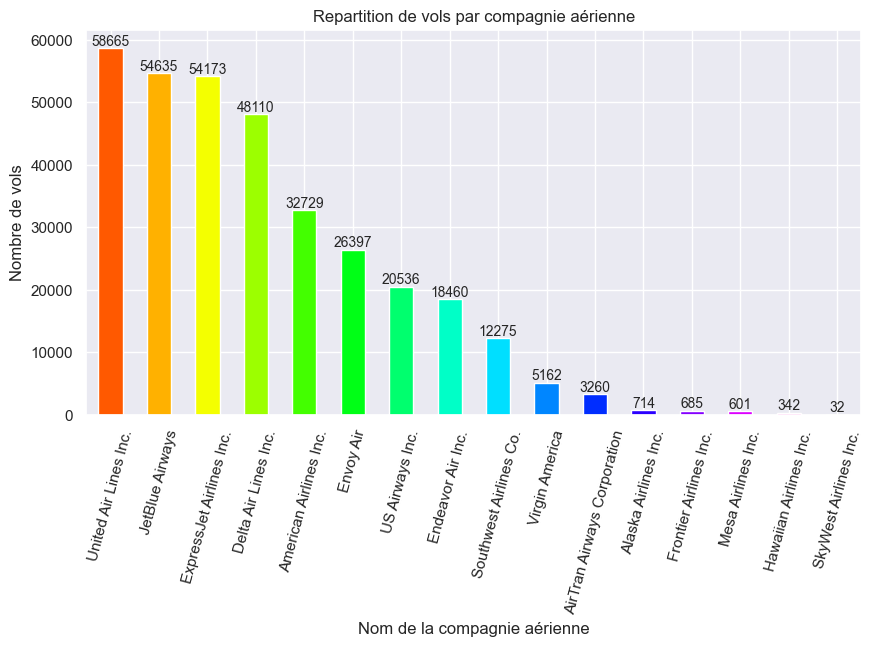

In [18]:
colors = sns.color_palette("hsv", len(df["name"].unique()))
ax = df.groupby("name")["id"].count().sort_values(ascending=False).plot(kind="bar", color=colors)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Repartition de vols par compagnie aérienne")
plt.xlabel("Nom de la compagnie aérienne")
plt.ylabel("Nombre de vols")
plt.xticks(rotation=75)
plt.show()

- La compagnie a le plus grand nombre de vols est: **United Air Lines Inc**

- compagnie a le plus petit nombre de vols est: **SkyWest Airlines Inc**.

---

4. Repartiton du nombre de vols retardés au depart par MOIS

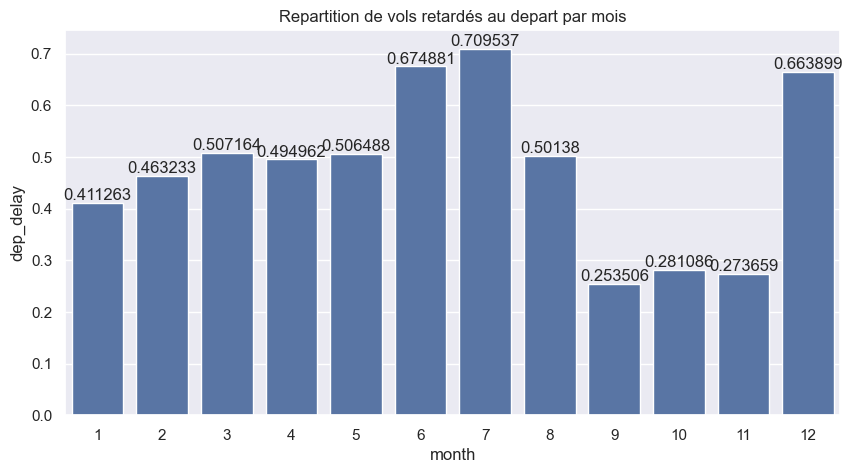

In [19]:
ax = sns.barplot(x="month", y="dep_delay", data=df, errorbar=None)
ax.bar_label(ax.containers[0])
plt.title("Repartition de vols retardés au depart par mois")
plt.show()

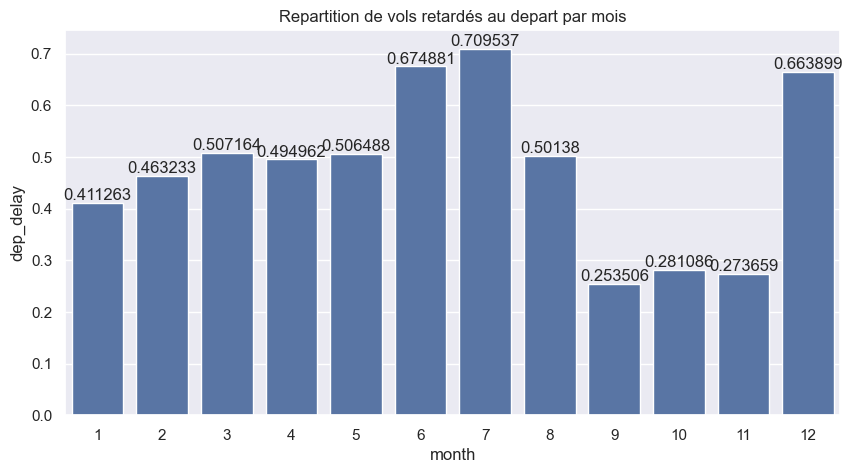

In [20]:
mf = df.groupby(['month'])['dep_delay'].mean().reset_index()
ax = sns.barplot(x="month", y="dep_delay", data=mf, errorbar=None)
ax.bar_label(ax.containers[0])
plt.title("Repartition de vols retardés au depart par mois")
plt.show()

---

5. Donner la répartition du nombre de vols retardés à l'arrivée par mois

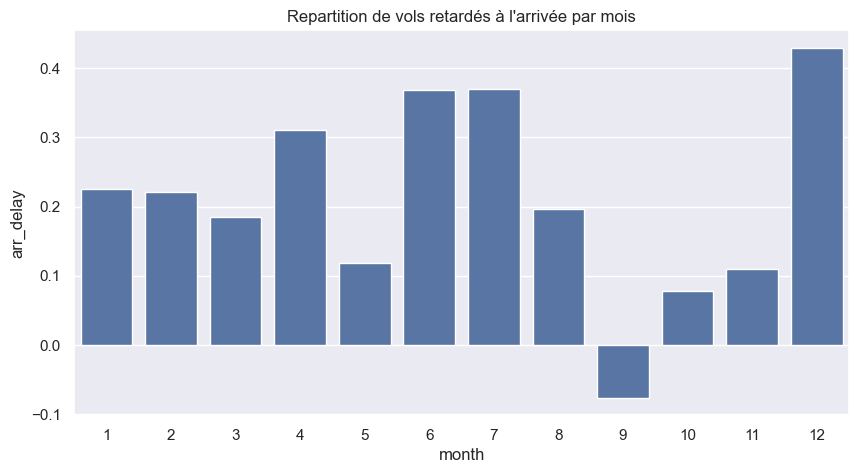

In [21]:
sns.barplot(x="month", y="arr_delay", data=df, errorbar=None)
plt.title("Repartition de vols retardés à l'arrivée par mois")
plt.show()

---

6. Quelles sont les retards au cours de la journée (retard au départ et à l'arrivée par jour) ?

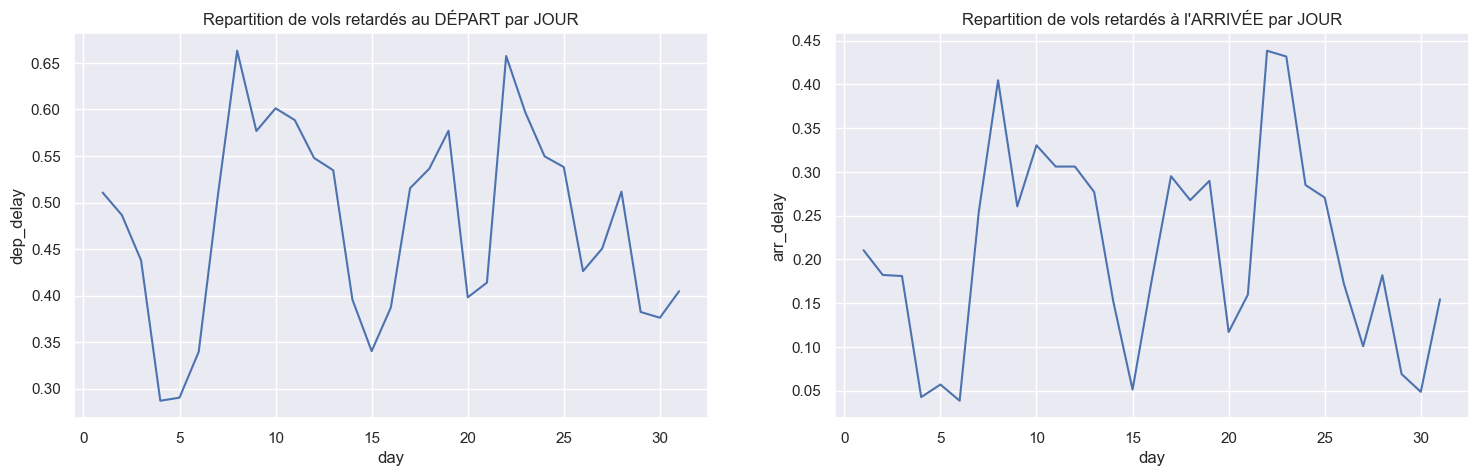

In [22]:
fig, ax = plt.subplots(1,2, figsize=(18,5))
sns.lineplot(x="day", y="dep_delay", data=df, errorbar=None,  ax=ax[0])
sns.lineplot(data=df, x="day", y="arr_delay", errorbar=None, ax=ax[1])
ax[0].set_title("Repartition de vols retardés au DÉPART par JOUR")
ax[1].set_title("Repartition de vols retardés à l'ARRIVÉE par JOUR")
plt.show()

                                
                                ☝️ = 👇🏻

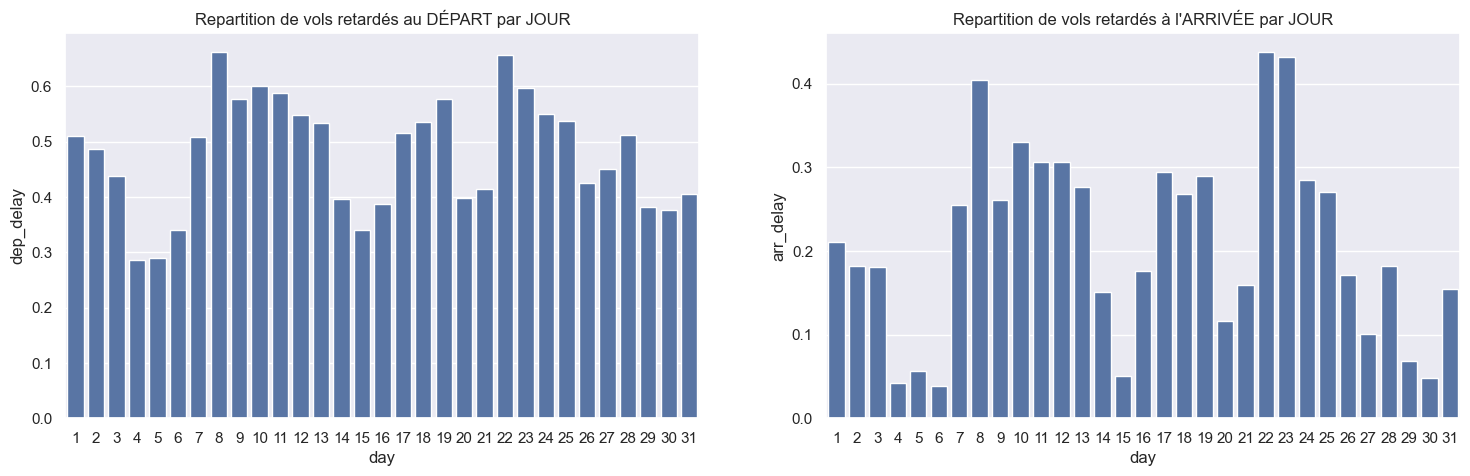

In [23]:
fig, ax = plt.subplots(1,2, figsize=(18,5))
sns.barplot(x="day", y="dep_delay", data=df, errorbar=None,  ax=ax[0])
sns.barplot(data=df, x="day", y="arr_delay", errorbar=None, ax=ax[1])
ax[0].set_title("Repartition de vols retardés au DÉPART par JOUR")
ax[1].set_title("Repartition de vols retardés à l'ARRIVÉE par JOUR")
plt.show()

---

7. Quelle est la compagnie ayant accusé le plus de retard ?

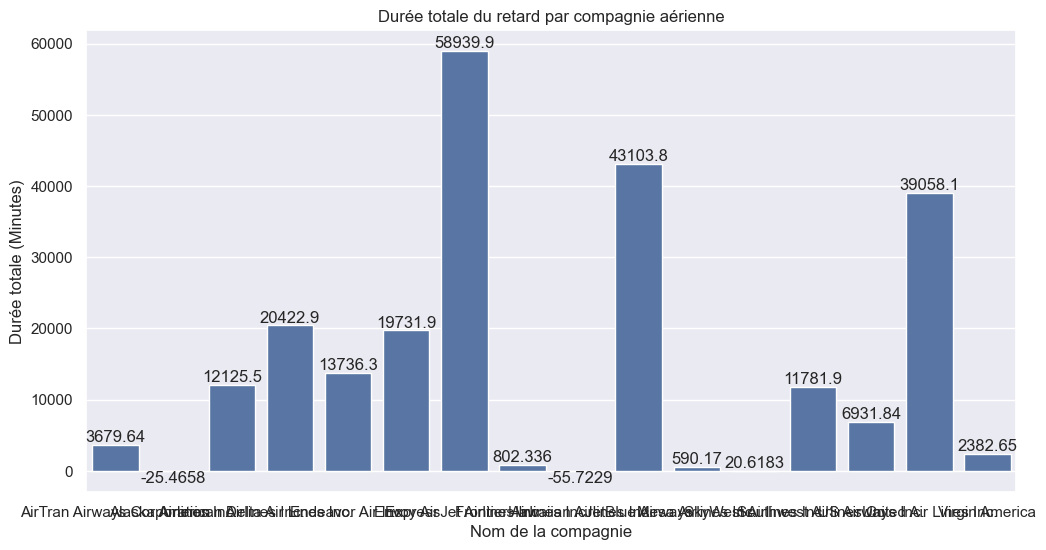

In [39]:
df_company = df.groupby('name')[['dep_delay', 'arr_delay']].sum().reset_index()
df_company['total_delay'] = df_company['dep_delay'] + df_company['arr_delay']

df_company = df_company[['name', 'total_delay']]

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='name', y='total_delay', data=df_company)
ax.bar_label(ax.containers[0])

plt.title("Durée totale du retard par compagnie aérienne")
plt.xlabel('Nom de la compagnie')
plt.ylabel('Durée totale (Minutes)')
plt.show()

- La compagnie ayant accusé plus de retard est: **☝️ ExpressJet Airlines Inc**

---

8. Visualisez la répartition des retards moyens en fonction des différents modèles d'avions (tailnum)

    - Quels modèles semblent être les plus sujets aux retards ?

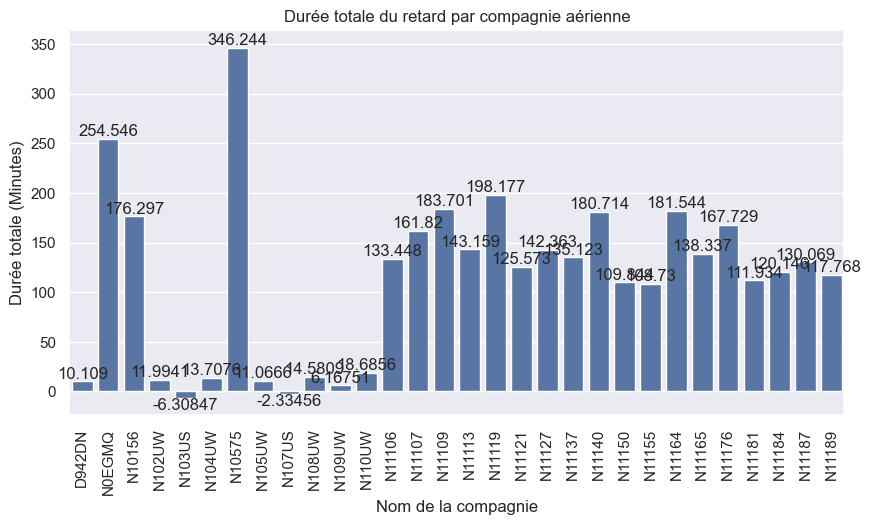

In [42]:
                                                                                #il y a 👇🏻 beaucoup d'aeronefs, le visuel va etre surcharhé, raison je filtre par les 30 premiers
df_tailnum = df.groupby('tailnum')[['dep_delay', 'arr_delay']].sum().reset_index().head(30)
df_tailnum['total_delay'] = df_tailnum['dep_delay'] + df_tailnum['arr_delay']

df_tailnum = df_tailnum[['tailnum', 'total_delay']]

ax = sns.barplot(x='tailnum', y='total_delay', data=df_tailnum)
ax.bar_label(ax.containers[0])

plt.xticks(rotation=90)
plt.title("Durée totale du retard par compagnie aérienne")
plt.ylabel('Durée totale (Minutes)')
plt.xlabel('Nom de la compagnie')
plt.show()

---

9. Feature scaling (mise à l'echelle commune de variables)

    - determination de la methode adequate

In [ ]:
nan_num_vars # 👇🏻 ces variables ont deja été standardisées lors de remplacement de valeurs manquantes, il faut donc enlever de la liste des autres variables numeriques à standardiser à la ligne suivante 👇🏻

Index(['dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'air_time'], dtype='object')

In [26]:
                                                   # 👇🏻  et 👇🏻 id et flight sont des simples numeros d'identification, donc pas besoin de les transformer   
num_cols = df.select_dtypes('number').drop(columns=['id', 'flight', 'dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'air_time']).columns
df[num_cols] = RobustScaler().fit_transform(df[num_cols])

---

Encodage

- la variable **origin** est **qualitative nominale**, donc, naturellement la methode d'encodage à choisir c'est OneHotEncoder

In [28]:
df['origin'] = OneHotEncoder(sparse_output=False).fit_transform(df[['origin']])
df['origin']

0         1.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
336771    0.0
336772    0.0
336773    0.0
336774    0.0
336775    0.0
Name: origin, Length: 336776, dtype: float64

---

- Sauvegarder toutes les modifications

In [29]:
df.to_csv("clean_df.csv", index=False)